In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('glass.data.txt', sep=",", header=None)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       214 non-null    int64  
 1   1       214 non-null    float64
 2   2       214 non-null    float64
 3   3       214 non-null    float64
 4   4       214 non-null    float64
 5   5       214 non-null    float64
 6   6       214 non-null    float64
 7   7       214 non-null    float64
 8   8       214 non-null    float64
 9   9       214 non-null    float64
 10  10      214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [3]:
data.shape

(214, 11)

In [4]:
data.head()

0        1      2     3     4      5     6     7    8    9   10
0   1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0   1
1   2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0   1
2   3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0   1
3   4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0   1
4   5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0   1

In [5]:
data.tail()

0        1      2    3     4      5     6     7     8    9   10
209  210  1.51623  14.14  0.0  2.88  72.61  0.08  9.18  1.06  0.0   7
210  211  1.51685  14.92  0.0  1.99  73.06  0.00  8.40  1.59  0.0   7
211  212  1.52065  14.36  0.0  2.02  73.42  0.00  8.44  1.64  0.0   7
212  213  1.51651  14.38  0.0  1.94  73.61  0.00  8.48  1.57  0.0   7
213  214  1.51711  14.23  0.0  2.08  73.36  0.00  8.62  1.67  0.0   7

In [6]:
data.groupby(10).count()[0]

10
1    70
2    76
3    17
5    13
6     9
7    29
Name: 0, dtype: int64

In [7]:
# The column that we will be making predictions with
inputs = data.iloc[:,1:-1]
inputs.shape

(214, 9)

In [8]:
inputs.head()

1      2     3     4      5     6     7    8    9
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0

In [9]:
# The column that we want to predict
outputs = data[10]
outputs = np.array(outputs)
outputs.shape

(214,)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,outputs,
                                                   test_size=0.30,
                                                   random_state=1)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
list_k = []
list_acc = []
for K_value in range(2,int(y_train.shape[0]**0.5)):
    list_k.append(K_value)
    neigh = KNeighborsClassifier(n_neighbors= K_value)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    acc = accuracy_score(y_test, y_pred)*100
    list_acc.append(acc)
    print("k=", K_value, ": Accuracy is ", accuracy_score(y_test, y_pred))
    

k= 2 : Accuracy is  0.7230769230769231
k= 3 : Accuracy is  0.7230769230769231
k= 4 : Accuracy is  0.7384615384615385
k= 5 : Accuracy is  0.7384615384615385
k= 6 : Accuracy is  0.7384615384615385
k= 7 : Accuracy is  0.7384615384615385
k= 8 : Accuracy is  0.6923076923076923
k= 9 : Accuracy is  0.7230769230769231
k= 10 : Accuracy is  0.6923076923076923
k= 11 : Accuracy is  0.7076923076923077


In [12]:
vi_tri = list_acc.index(max(list_acc))
k = list_k[vi_tri]
print('The optimal number of neighbors is ', k, 'with', list_acc[vi_tri])

The optimal number of neighbors is  4 with 73.84615384615385


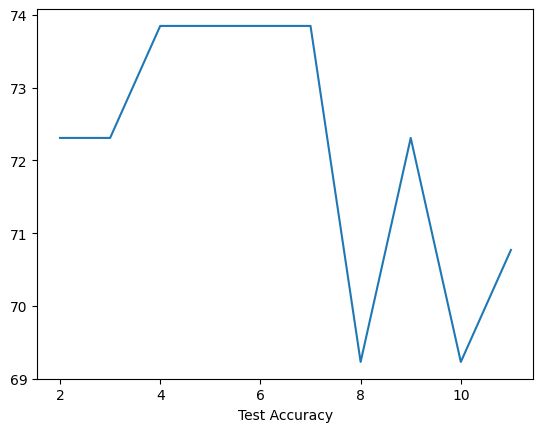

In [13]:
plt.plot(list_k,list_acc)
plt.xlabel('Number of Neighbors K')
plt.xlabel('Test Accuracy')
plt.show()

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
for i in range(4,8):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    print('k=', i, ': The Train prediction accuracy is: ', knn.score(X_train, y_train)*100, '%')
    print('------ The Test prediction accuracy is: ', knn.score(X_test, y_test)*100, '%')

k= 4 : The Train prediction accuracy is:  76.51006711409396 %
------ The Test prediction accuracy is:  73.84615384615385 %
k= 5 : The Train prediction accuracy is:  72.48322147651007 %
------ The Test prediction accuracy is:  73.84615384615385 %
k= 6 : The Train prediction accuracy is:  71.14093959731544 %
------ The Test prediction accuracy is:  73.84615384615385 %
k= 7 : The Train prediction accuracy is:  66.44295302013423 %
------ The Test prediction accuracy is:  73.84615384615385 %


In [20]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [21]:
# Kiểm tra độ chính xác
print('The Train prediction accuracy is: ', knn.score(X_train, y_train)*100, '%')
print('The Test prediction accuracy is: ', knn.score(X_test, y_test)*100, '%')

The Train prediction accuracy is:  72.48322147651007 %
The Test prediction accuracy is:  73.84615384615385 %


In [22]:
y_pred = knn.predict(X_test)

In [25]:
df=pd.DataFrame({'Actual':pd.DataFrame(y_test)[0].values,
                 'Prediction':pd.DataFrame(y_pred)[0].values})
df.head()

Actual  Prediction
0       2           5
1       7           7
2       2           2
3       2           2
4       1           1

In [26]:
# đánh giá model
from sklearn.metrics import confusion_matrix, classification_report

In [27]:
confusion_matrix(y_test, y_pred)

array([[22,  3,  0,  0,  0,  0],
       [ 3, 15,  0,  2,  1,  0],
       [ 6,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  1,  0],
       [ 1,  0,  0,  0,  0,  8]], dtype=int64)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.69      0.88      0.77        25
           2       0.79      0.71      0.75        21
           3       0.00      0.00      0.00         7
           5       0.50      1.00      0.67         2
           6       0.50      1.00      0.67         1
           7       1.00      0.89      0.94         9

    accuracy                           0.74        65
   macro avg       0.58      0.75      0.63        65
weighted avg       0.68      0.74      0.70        65



C:\Program Files\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- Quan sát kết quả và đánh giá: Mô hình có độ chính xác chưa cao, còn có class dự đoán không chính xác do số lường trong các class còn ít và chưa cân bằng

In [29]:
# Feature Selection
# get correlations of each feature in dataset
dat_sub = data.iloc[:,1:]
corrat = dat_sub.corr()
top_corr_features = corrat.index

In [30]:
dat_sub.corr()

1         2         3         4         5         6         7   \
1   1.000000 -0.191885 -0.122274 -0.407326 -0.542052 -0.289833  0.810403   
2  -0.191885  1.000000 -0.273732  0.156794 -0.069809 -0.266087 -0.275442   
3  -0.122274 -0.273732  1.000000 -0.481799 -0.165927  0.005396 -0.443750   
4  -0.407326  0.156794 -0.481799  1.000000 -0.005524  0.325958 -0.259592   
5  -0.542052 -0.069809 -0.165927 -0.005524  1.000000 -0.193331 -0.208732   
6  -0.289833 -0.266087  0.005396  0.325958 -0.193331  1.000000 -0.317836   
7   0.810403 -0.275442 -0.443750 -0.259592 -0.208732 -0.317836  1.000000   
8  -0.000386  0.326603 -0.492262  0.479404 -0.102151 -0.042618 -0.112841   
9   0.143010 -0.241346  0.083060 -0.074402 -0.094201 -0.007719  0.124968   
10 -0.164237  0.502898 -0.744993  0.598829  0.151565 -0.010054  0.000952   

          8         9         10  
1  -0.000386  0.143010 -0.164237  
2   0.326603 -0.241346  0.502898  
3  -0.492262  0.083060 -0.744993  
4   0.479404 -0.074402  0.598829  
5  -0.102151 -0.094201  0.151565  
6  -0.042618 -0.007719 -0.010054  
7  -0.112841  0.124968  0.000952  
8   1.000000 -0.058692  0.575161  
9  -0.058692  1.000000 -0.188278  
10  0.575161 -0.188278  1.000000

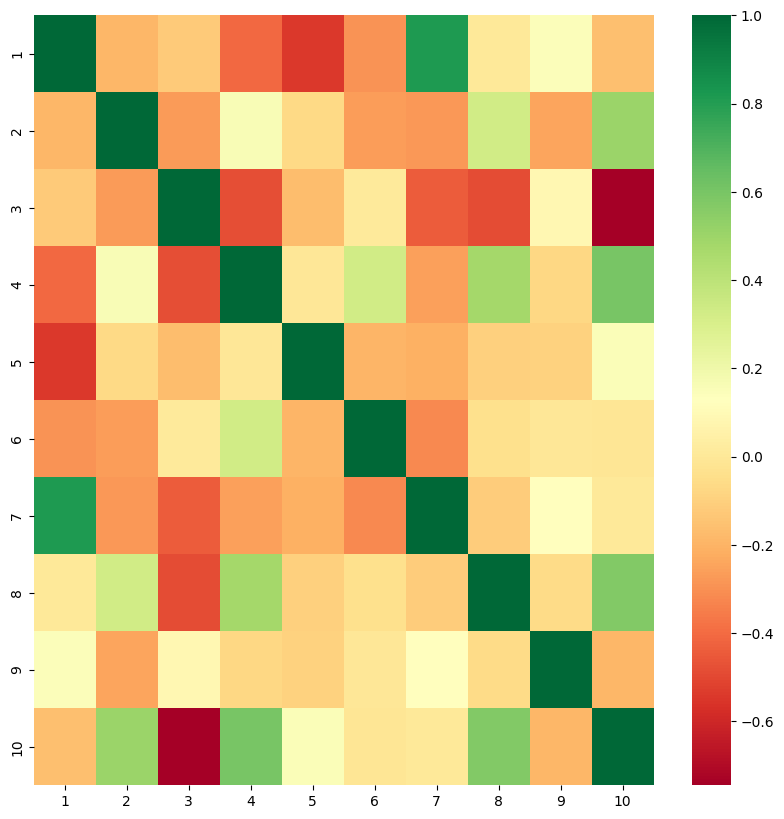

In [32]:
import seaborn as sns
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),cmap='RdYlGn') 

In [33]:
# 2,3,4,8 có high corr

In [34]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [37]:
# apply SelectKBest class to extract all best features
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(inputs, outputs)
dfscores = pd.DataFrame(fit.scores_)
dfcolumn = pd.DataFrame(inputs.columns)

In [39]:
# Concat 2 df for bester visualization
featureScores = pd.concat([dfcolumn,dfscores],axis=1)
featureScores.columns = ['Specs', 'Score']
print(featureScores.nlargest(9,'Score'))

   Specs       Score
7      8  145.514077
2      3  100.984212
5      6   31.670632
3      4   16.977488
1      2    4.311253
6      7    3.210929
8      9    2.170185
4      5    0.110449
0      1    0.000048


In [ ]:
# 8,3,6,4,2 có high corr

In [ ]:
#=> Select feature => KNN